In [5]:
%matplotlib inline
import json
import math
import matplotlib
from matplotlib import pyplot as plt
import seaborn

seaborn.set_context({'figure.figsize': (24, 12)})
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

In [6]:
def doplot(axis, data, color, label, linestyle, symbol):
    if len(data) == 1:
        axis.plot(range(len(data)), data, symbol, color=color, label=label)
    else:
        axis.plot(range(len(data)), data, color=color, linestyle=linestyle, label=label)

In [7]:
with open('roc-data.json', 'r') as fh:
    tp_fp = json.load(fh)

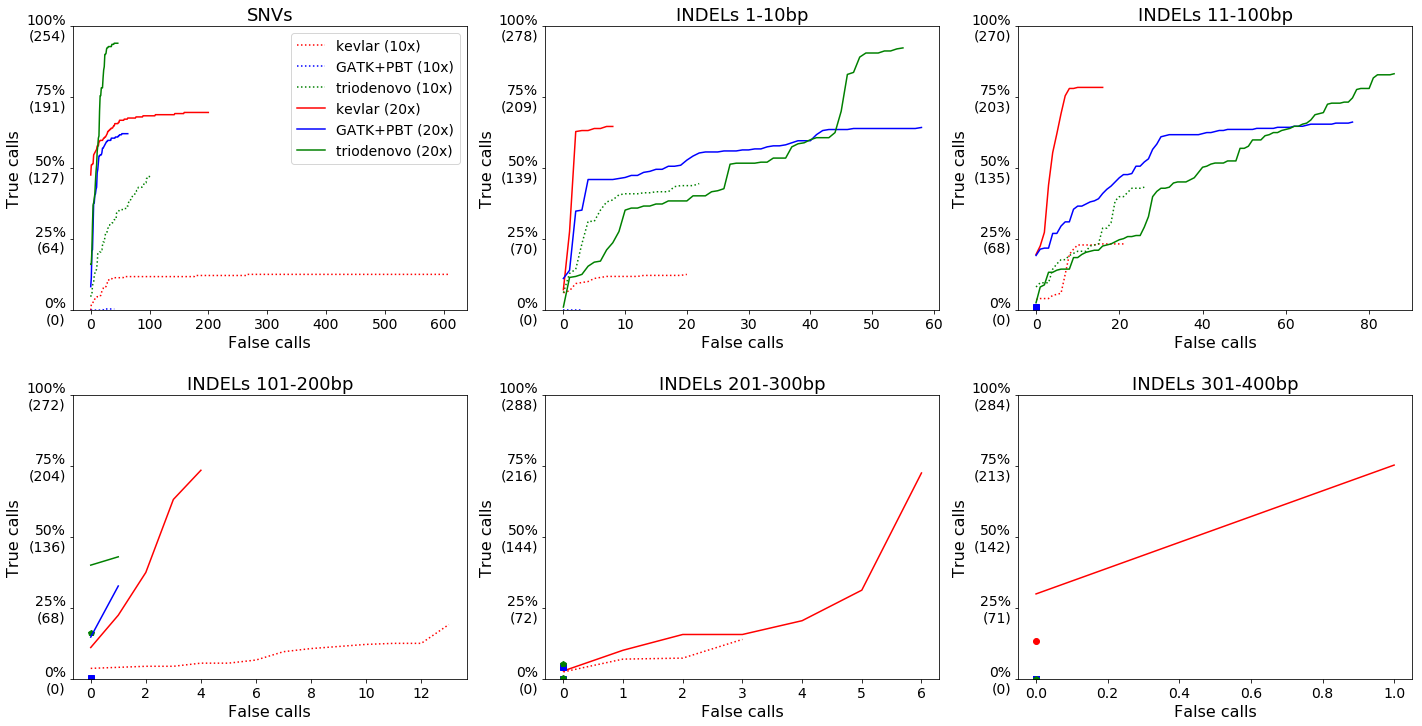

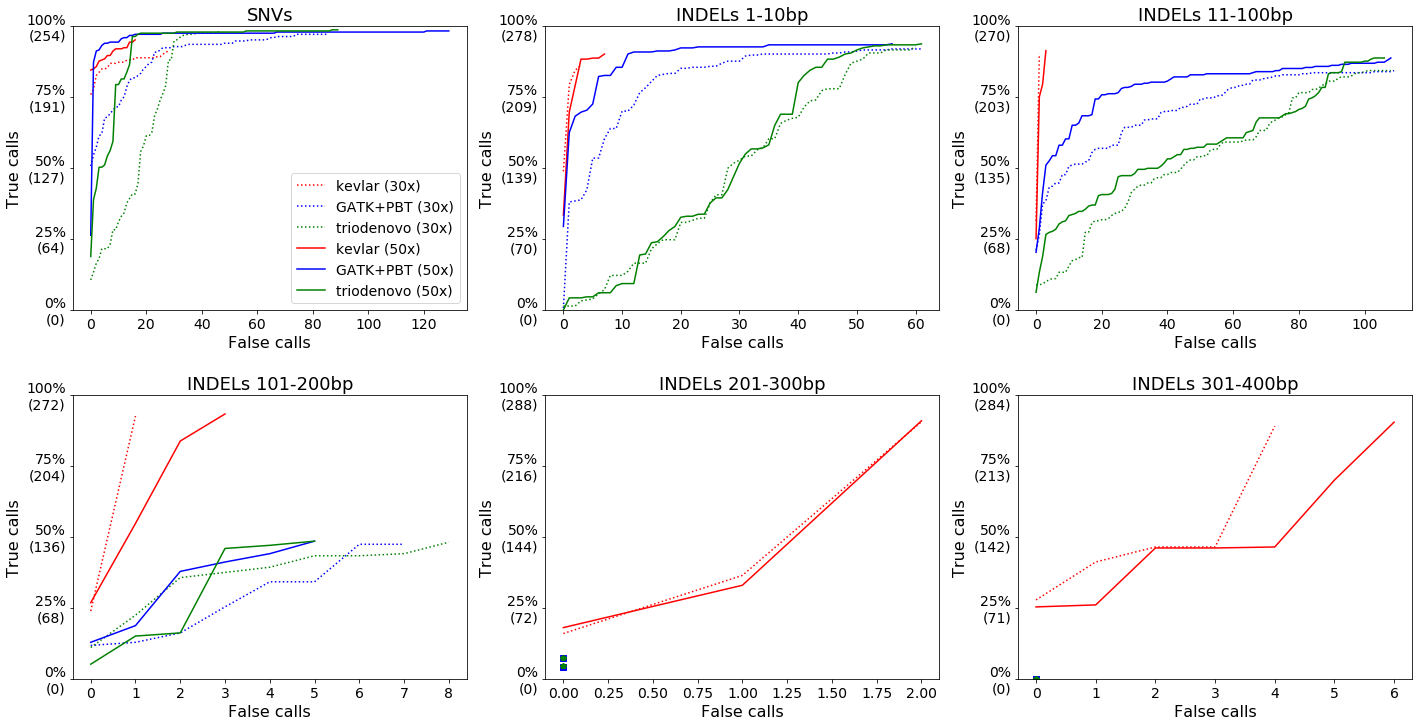

In [8]:
delta = 10

for cov1, cov2 in (('10', '20'), ('30', '50')):
    categories = [
        ('SNVs', 254),
        ('INDELs 1-10bp', 278),
        ('INDELs 11-100bp', 270),
        ('INDELs 101-200bp', 272),
        ('INDELs 201-300bp', 288),
        ('INDELs 301-400bp', 284),
    ]
    fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3)
    axes = (ax11, ax12, ax13, ax21, ax22, ax23)
    seaborn.set_context({'figure.figsize': (24, 12)})
    
    for i, (category, axis) in enumerate(zip(categories, axes)):
        label, nvariants = category
        for cov, linestyle in zip((cov1, cov2), (':', '-')):
            kevlar_truecalls = tp_fp['kevlar'][cov][label]
            gatk_truecalls = tp_fp['gatk'][cov][label]
            triodenovo_truecalls = tp_fp['triodenovo'][cov][label]

            doplot(axis, kevlar_truecalls, 'red', 'kevlar ({}x)'.format(cov), linestyle, 'o')
            doplot(axis, gatk_truecalls, 'blue', 'GATK+PBT ({}x)'.format(cov), linestyle, 's')
            doplot(axis, triodenovo_truecalls, 'green', 'triodenovo ({}x)'.format(cov), linestyle, 'p')
        
        ticknums = [0, math.ceil(nvariants * 0.25), int(nvariants * 0.5), math.ceil(nvariants * 0.75), nvariants]
        ticklabels = ['{:d}%\n({:d})'.format(int(tn / nvariants * 100), tn) for tn in ticknums]
        
        _ = axis.set_xlabel('False calls', fontsize=16)
        _ = axis.set_yticks(ticknums)
        _ = axis.set_yticklabels(ticklabels)
        _ = axis.set_ylabel('True calls', fontsize=16)
        _ = axis.set_ylim((0, nvariants))
        _ = axis.set_title(label, fontsize=18)
        if i == 0:
            _ = axis.legend(fontsize=14)
    
    _ = plt.subplots_adjust(hspace=0.3)
    _ = plt.savefig('three-callers-'+ cov +'x-combined.pdf', dpi=300)
    _ = plt.show()